In [ ]:
# I would like some type of code here to hide and show the code like with my R handouts


<style>
div.blue{
    background-color:#e6f0ff; 
    border-radius: 5px; 
    padding: 20px;}
</style> 

<style>
div.warn {    
    background-color: #fcf2f2;
    border-color: #dFb5b4;
    border-left: 5px solid #dfb5b4;
    padding: 0.5em;
    }
 </style>
    
<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Python Lab Title </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Handout # </h2>


## The t-distribution, the normal distribution and the critical values


The t distribution is the distribution we use to do inference of our estimated parameters. Below is a graph of the t-distribution together with the normal distribution. See how similiar they are when the sample is big enough. 
Let's use the quartile funtion to check for the critical values for both functions. We can see that they are very similar. For big enough samples you can use the critical values from the normal distribution.

In the code below the t distribution you can play changing the degrees of freedom (df) and see how similiar it is to the standard normal. 

Modify the code increasing the degrees of freedom

In [ ]:
from scipy.stats import norm
from scipy.stats import t
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import wooldridge as woo
import statsmodels.formula.api as smf


from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

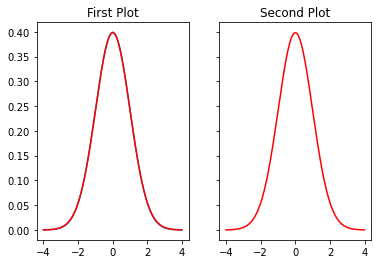

In [ ]:
x_axis = np.arange(-4, 4, 0.01)
y1=norm.pdf(x_axis,0,1)
y2=t.pdf(x_axis,df=100)

fig, axs = plt.subplots(ncols=2, sharey=True)
sns.lineplot(x=x_axis, y=y1, ax=axs[0])
sns.lineplot(x=x_axis, y=y2, ax=axs[1],color='red')
axs[0].plot(x_axis, y2, color='red');
axs[0].title.set_text('First Plot')
axs[1].title.set_text('Second Plot')

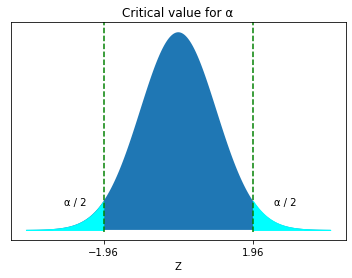

In [ ]:
xlow = np.arange(-4, -1.96, 0.01)
xup = np.arange(1.96, 4, 0.01)
y1=norm.pdf(x_axis,0,1)
y2=norm.pdf(xup,0,1)
y3=norm.pdf(xlow,0,1)

fig, ax1 = plt.subplots()

ax1.fill_between(x_axis, y1)
ax1.fill_between(xlow, y3, color='cyan')
ax1.fill_between(xup, y2, color='cyan')
ax1.axvline(x=-1.96,  ls='--', color='g',ymin= 0.035)
ax1.axvline(x=1.96 ,  ls='--', color='g', ymin= 0.035)
ax1.text(x=-3, y=0.05, s="\u03B1 / 2")
ax1.text(x=2.5, y=0.05, s="\u03B1 / 2")


plt.setp(ax1, xticks=[-1.96,1.96], yticks=[], xlabel='Z', title="Critical value for \u03B1");


After seeing this let's see how similar critical values are for both distributions

The value of alpha that what we use for hypothesis testing in our regression, type error 1. 

In [ ]:
# CV for alpha=5% and 1% using the t distribution with 137 d.f.:
alpha = np.array([0.05, 0.01])
cv_t = stats.t.ppf(1 - alpha / 2, 137)
print(f'cv_t: {cv_t}\n')

# CV for alpha=5% and 1% using the normal approximation:
cv_n = stats.norm.ppf(1 - alpha / 2)
print(f'cv_n: {cv_n}\n')


cv_t: [1.97743121 2.61219198]

cv_n: [1.95996398 2.5758293 ]



## The *t* test 

After learning the magnitude and sign of the estimated coefficients in a regression, the next step in empirical research is investigating the statistical significance of these estimates. 

### General Setup

We are often interested in testing whether there is a relation at all between the dependent variable $y$ and a regressor $x_j$ and do not want to impose a sign on the partial effect a *priori*. 
So we have the null hypotesis of the form
$$ H_0: \beta_j = a_j $$ 
where $a_j$ is some given number, very often $a_j=0$. The standard two-tailed where the alternative hypothesis is 
$$ H_1: \beta_j \neq a_j $$
and one- tailed test it is either one of 

$$H_1: \beta_j < a_j  \;\;\;\;  or \;\;\;\;   H_1: \beta_j > a_j$$ 

The hypotheses can be conveniently tested using a t test which is based on the statistic

$$ t= \frac{\hat{\beta_j} - a_j}{se(\hat{\beta_j})}$$
If $H_0$ is in fact true and the CLM assumptions hold, then this statistic has a t distribution with n-k-1 degrees of freedom.

Since the standard case of a t test,$a_j=0$, is so common R provides us with the relevant t and p values directly in the **summary** of the estimation results. 

In other words the formula is: 
$$ t= \frac{estimate - hypothesized \; value }{standard \; error}$$

Let's see an example from Wooldridge Chapter 4. Using gpa1 data 

### t-test step-by-step

You rarely use this method, but it is crucial to understand how these number are calculated to know how to read the regression results from the summary table as those caluclations are done there. See both and compare this with the resgression summary table. 

In [ ]:

gpa1 = woo.dataWoo('gpa1')
# store results:
reg = smf.ols(______, data=gpa1)
results =reg.fit()

# manually confirm the formulas, i.e. extract coefficients and SE:
b = results.params
se = results.bse

# reproduce t statistic:
tstat = b/se
print(f'tstat: \n{tstat}\n')

df = results.nobs - 3-1

# reproduce p value:
pval = 2*stats.t.cdf(-abs(tstat), df)

# use the np.around() function to round array 
print(f'PValue: \n {np.around(pval,4)}\n')

tstat: 
Intercept    4.191039
hsGPA        4.396260
ACT          1.393319
skipped     -3.196840
dtype: float64

PValue: 
 [0.     0.     0.1658 0.0017]



### t-test in the regression results

the summary of the `smf.ols()` or the stargazer table both provide with inference analysis and they both contained the same information it is just display differently. 

`.summary()` Provides a table that has four relevant columns related to the coefficients

|Indep variables |  Estimate  | Std. Error | t-statistic value    | **$Pr(>|t|)$** |[0.025	0.975]| 
|----------------------|-------------|-----------------|-------------------|-------------|---------|
|Var Names| Estimated ($\beta's$) | ($\beta's$) standard errors | $(\hat\beta - 0) / se$ | p-value for $\beta$| Confidence intervals at 95%|

In [ ]:
# Display the regression results from the results object 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colGPA   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     13.92
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           5.65e-08
Time:                        19:04:41   Log-Likelihood:                -41.501
No. Observations:                 141   AIC:                             91.00
Df Residuals:                     137   BIC:                             102.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3896      0.332      4.191      0.000       0.734       2.045
hsGPA          0.4118      0.094      4.396      0.000       0.227       0.597
ACT            0.0147      0.011      1.393      0.166      -0.006       0.036
skipped       -0.0831      0.026     -3.197      0.002      -0.135      -0.032
==============================================================================
Omnibus:                        1.917   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.636
Skew:                           0.125   Prob(JB):                        0.441
Kurtosis:                       2.535   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='blue'>
    The results above, both from the step-by-step method and doing the `summary()`, are equal and provide the same information. Remember that a $|t|>2$ is the rule of thumb to reject the null hypothesis. 

   From our calculation above, the critical value for $\alpha =0.05$ was 1.97 the t-stats for High School GPA and skipped are bigger than this number. Showing the $$ H_0: \beta_j = 0 $$ is rejected in favor of $$ H_a: \beta_j \neq a_j $$ 
    
   p-values are also closed to zero informing about the level of significance of our variables. Highs School GPA for example is significant at 1%
    
</font> 


`stargazer(model)` Provides a table with one column per model 

|Independent variables |  Estimate|
|---------------------|------------|
|Variable name| Estimated ($\beta's$) with stars the imply statistical significance at certain $\alpha$|
|                  |(standard errors in parenthesis)| 

In [ ]:

# Let's see the regression results in the stargazer table why are the stars there? what do they show? 

stargazer = Stargazer([_____])
HTML(stargazer.render_html())

## Confindence Intervals

Confindence intervals for regression coefficients are related to the t test. The 95% confidence inteval for parameter $\hat{\beta_j}\pm c \cdot se(\hat{\beta_j})$ 
where $c$ is the same critical value for the two sided t test using a significance level $\alpha=5\%$

In Python you can calculate CI for all coefficients: 
Store the regressions results in an *object* and then use the method **.conf_int()** to obtain a table of 95% confidence intervals. 


In [ ]:
# 95% CI:
#default alpha is 0.05, no need to specify
results.conf_int()


,0,1
Intercept,0.733930,2.045178
hsGPA,0.226582,0.597050
ACT,-0.006171,0.035612
skipped,-0.134523,-0.031703


You can use the option alpha=value to chose other levels. 99% CI for example  **`results.conf_int(alpha=0.01, cols=None)`** 

In [ ]:
# 99% CI:
results.conf_int(alpha=0.01, cols= None)

,0,1
Intercept,0.523472,2.255635
hsGPA,0.167121,0.656511
ACT,-0.012877,0.042318
skipped,-0.151026,-0.015200


The following table provides some useful functions when doing inference in R. 

Function | Result
---------|---------
`mean(x)` | mean of a sample, $\bar{X} = \sum_{i=1}^n X_i/n$
`sd(x)` | standard deviation of a sample $s_x = \sqrt{\sum_{i=1}^n (X_i-\bar{X})^2 / (n-1)}$
`var(x)` | variance of a sample $s_x^2 = \sum_{i=1}^n (X_i-\bar{X})^2 / (n-1)$
`cov(x, y)` | Sample covariance of two variables $s_{x,y} = \sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y}) / (n-1)$
`sqrt()` | Square root of a number
`length()` | Number of observations
`t.test()` | Perform a one- or two-sample *t* test

**Caveat** `t.test()` is not for regression coefficients, it is for test difference in sample means. The t-test for the regression coefficients is perfomed automatically by the lm command or if you have an specific hypothesis 

## Linear restrictions: The *F* test {.tabset} 

This test allows you to test the significance of various parameters at the same time. The test statistic of the `F` test is based on the relative difference between the sum of squared residuals in the general (unrestricted) model and a restricted model in which the hypoteses are imposed $SSR_{ur}$ and $SSR_{r}$, respectively. 
$$F={{\frac{SSR_{r}-SSR_{ur}}{SSR_{ur}}}\cdot{\frac{n-k-1}{q}}}= {{\frac{R^2_{ur}-R^2_{r}}{1-R^2_{ur}}}\cdot{\frac{n-k-1}{q}}}$$

where q is the number of restrictions, n the number of observations and k the number of parameters in the regression. 

Let's play with this regression, from Wooldridge Chapter 4.  
$$log(salary)=\beta_0 + \beta1\cdot years + \beta_2 \cdot gamesyr + \beta_3 \cdot bavg + \beta_4 \cdot hrunsyr +\beta_5 \cdot rbisyr +u$$


### F test step-by-step

* Import packages, we will need scipy.stats to look into the F distribition
* Import dataset mlb1
* Get the number of observations in the dataset using `.shape[0]`

In [ ]:
mlb1 = ________.____('mlb1')
n = mlb1.shape[0]

$R^2$ of unrestricted OLS regression:

In [ ]:
reg_ur = smf.ols(
    formula=____________________________,
    data=mlb1)
fit_ur = reg_ur.fit()
r2_ur = ___________________
print(f'𝑅2 of unrestricted OLS regression: {r2_ur}\n')

$R^2$ of restricted OLS regression, here we do not include the variables bavg , hrunsyr , rbisyr

In [ ]:
reg_r = smf.ols(formula=_____________, data=mlb1)
fit_r = reg_r.fit()
r2_r = _________________
print(f'𝑅2 of restricted OLS regression:: {r2_r}\n')

<font color='blue'> Calculate the F statistic: <font>

In [ ]:
fstat = ___________________
print(f'fstat: {fstat}\n')

CV for alpha=1% using the F distribution with 3 and 347 d.f.:

In [ ]:
cv = ____________________
print(f'Critical value at 1% with 3 and 347 df= {cv}')

 p value = 1-cdf of the appropriate F distribution:

In [ ]:
fpval = _________________________
print(f'fpval: {round(fpval,4)}\n')


### F test using `f_test` 

Python provides a more convinient way do this. But is always best to know were this function what is behind those magical functions.  The module statsmodels provides the command **`f-test`** that allows you to perfom this kind of tests. One you have estimates your regression and stored your results in an object, for our example named **results**

> `hypothesis = ["var_name1 = 0", "var_name2 = 0", ...]
   ftest = results.f_test()hypothesis)`

where **`hypothesis`** represents the null hypothesis to be tested. It is a list of lenght q where each restriction is described as a text in which the variable name takes the place of its parameter. 


The package car provides the command `linearHypothesis()`which is adequate for this types of test. 

In [ ]:

mlb1 = ___________.______('mlb1')

# OLS regression:
reg = _______(
    formula=____________________________,
    data=mlb1)
results = reg.fit()

# automated F test:
hypotheses = ____________________
ftest = ___________________
fstat = ________________
fpval = __________________
# Beacuse fstat comes form an array we need .around() to round it. 

print(f'Fstat: {np.around(fstat, 3)}\n')

print(f'Fpval: {np.around(fpval,3)}\n')

### F test using compare_f_test()

You can just use  `.compare_f_test()` to compare both models. Run both *unrestricted* and *restricted* and apply the method: `unrestricted.compare_f_test(restricted)`. The results provide an array with the fstat, p-value and degrees of freedom. 

In [ ]:
fit_ur.compare_f_test(fit_r)

### Testing of other hypothesis

We can perform a more complicated hypothesis like that there is a relation between two variables $\beta_i =c*\beta_i$ where c is a constant.

In [ ]:
# automated F test:
hypotheses = _________________
ftest = __________________
fstat = ______________
fpval = ___________________

print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

In [ ]:
!jupyter nbconvert --to html Econ320_Lab_class10_Inference.ipynb

&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;